# Clustering on text descriptions

In this project, you'll work with a corpus of item descriptions from an outdoor apparel brand's product catalog.
The dataset is available on Kaggle : https://www.kaggle.com/cclark/product-item-data?select=sample-data.csv


We would like to make some clustering on this corpus, in order to identify groups of products that are similar based on their descriptions.

1. Import pandas, spacy, sklearn (tfidf vectorizer and DBSCAN), matplotlib and wordcloud

In [52]:
import en_core_web_sm
import fr_core_news_sm
from spacy.lang.en.stop_words import STOP_WORDS
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import DBSCAN

import matplotlib.pyplot as plt
import wordcloud
import plotly.express as px
import numpy as np

import re
import wordcloud

import pandas as pd

2. Read the corpus and put it in a DataFrame named `corpus`, explore it and print the full description in the first line

In [25]:
corpus = pd.read_csv('02_Text/text_clustering_data/sample-data.csv')
display(corpus.head())
display(corpus.shape)

,id,description
0,1,Active classic boxers - There's a reason why o...
1,2,Active sport boxer briefs - Skinning up Glory ...
2,3,Active sport briefs - These superbreathable no...
3,4,"Alpine guide pants - Skin in, climb ice, switc..."
4,5,"Alpine wind jkt - On high ridges, steep ice an..."


(500, 2)

In [26]:
corpus.loc[0, 'description']

'Active classic boxers - There\'s a reason why our boxers are a cult favorite - they keep their cool, especially in sticky situations. The quick-drying, lightweight underwear takes up minimal space in a travel pack. An exposed, brushed waistband offers next-to-skin softness, five-panel construction with a traditional boxer back for a classic fit, and a functional fly. Made of 3.7-oz 100% recycled polyester with moisture-wicking performance. Inseam (size M) is 4 1/2". Recyclable through the Common Threads Recycling Program.<br><br><b>Details:</b><ul> <li>"Silky Capilene 1 fabric is ultralight, breathable and quick-to-dry"</li> <li>"Exposed, brushed elastic waistband for comfort"</li> <li>5-panel construction with traditional boxer back</li> <li>"Inseam (size M) is 4 1/2"""</li></ul><br><br><b>Fabric: </b>3.7-oz 100% all-recycled polyester with Gladiodor natural odor control for the garment. Recyclable through the Common Threads Recycling Program<br><br><b>Weight: </b>99 g (3.5 oz)<br><b

3. Use `str` methods to clean the texts (check it worked with the first document)

In [27]:
def remove_html_tags(text):
    """Remove html tags from a string"""
    clean = re.compile('<.*?>')
    return re.sub(clean, ' ', text)

corpus['clean_description'] = corpus['description'].apply(lambda x : remove_html_tags(x))
corpus['clean_description'] = corpus['clean_description'].str.replace(r"[^A-Za-z]+", " ")
corpus['clean_description'] = corpus['clean_description'].apply(lambda x : x.strip())

display(corpus.head())
display(corpus.shape)

,id,description,clean_description
0,1,Active classic boxers - There's a reason why o...,Active classic boxers There s a reason why our...
1,2,Active sport boxer briefs - Skinning up Glory ...,Active sport boxer briefs Skinning up Glory re...
2,3,Active sport briefs - These superbreathable no...,Active sport briefs These superbreathable no f...
3,4,"Alpine guide pants - Skin in, climb ice, switc...",Alpine guide pants Skin in climb ice switch to...
4,5,"Alpine wind jkt - On high ridges, steep ice an...",Alpine wind jkt On high ridges steep ice and a...


(500, 3)

In [28]:
corpus.loc[0, 'clean_description']

'Active classic boxers There s a reason why our boxers are a cult favorite they keep their cool especially in sticky situations The quick drying lightweight underwear takes up minimal space in a travel pack An exposed brushed waistband offers next to skin softness five panel construction with a traditional boxer back for a classic fit and a functional fly Made of oz recycled polyester with moisture wicking performance Inseam size M is Recyclable through the Common Threads Recycling Program Details Silky Capilene fabric is ultralight breathable and quick to dry Exposed brushed elastic waistband for comfort panel construction with traditional boxer back Inseam size M is Fabric oz all recycled polyester with Gladiodor natural odor control for the garment Recyclable through the Common Threads Recycling Program Weight g oz Made in Mexico'

4. Tranform every character into lowercase (check it worked with the first document)

In [29]:
corpus['clean_description'] = corpus['clean_description'].apply(lambda x : x.lower())
corpus.loc[0, 'clean_description']

'active classic boxers there s a reason why our boxers are a cult favorite they keep their cool especially in sticky situations the quick drying lightweight underwear takes up minimal space in a travel pack an exposed brushed waistband offers next to skin softness five panel construction with a traditional boxer back for a classic fit and a functional fly made of oz recycled polyester with moisture wicking performance inseam size m is recyclable through the common threads recycling program details silky capilene fabric is ultralight breathable and quick to dry exposed brushed elastic waistband for comfort panel construction with traditional boxer back inseam size m is fabric oz all recycled polyester with gladiodor natural odor control for the garment recyclable through the common threads recycling program weight g oz made in mexico'

5. Use spacy to tokenize the documents (put the result in a new column named "clean_tokens"

In [34]:
nlp = en_core_web_sm.load()

## Tokenize the cleaned document
corpus['clean_tokens'] = corpus['clean_description'].apply(lambda x: nlp(x))
corpus.head()

,id,description,clean_description,clean_tokens
0,1,Active classic boxers - There's a reason why o...,active classic boxers there s a reason why our...,"(active, classic, boxers, there, s, a, reason,..."
1,2,Active sport boxer briefs - Skinning up Glory ...,active sport boxer briefs skinning up glory re...,"(active, sport, boxer, briefs, skinning, up, g..."
2,3,Active sport briefs - These superbreathable no...,active sport briefs these superbreathable no f...,"(active, sport, briefs, these, superbreathable..."
3,4,"Alpine guide pants - Skin in, climb ice, switc...",alpine guide pants skin in climb ice switch to...,"(alpine, guide, pants, skin, in, climb, ice, s..."
4,5,"Alpine wind jkt - On high ridges, steep ice an...",alpine wind jkt on high ridges steep ice and a...,"(alpine, wind, jkt, on, high, ridges, steep, i..."


6. Remove stop words and lemmatize *clean_tokens*

In [35]:
# remove stop-words
corpus['clean_tokens'] = corpus['clean_tokens'].apply(lambda x: [token.lemma_ for token in x if token.lemma_ not in STOP_WORDS])

# lemmatize

corpus.head()

,id,description,clean_description,clean_tokens
0,1,Active classic boxers - There's a reason why o...,active classic boxers there s a reason why our...,"[active, classic, boxer, s, reason, -PRON-, bo..."
1,2,Active sport boxer briefs - Skinning up Glory ...,active sport boxer briefs skinning up glory re...,"[active, sport, boxer, brief, skin, glory, req..."
2,3,Active sport briefs - These superbreathable no...,active sport briefs these superbreathable no f...,"[active, sport, brief, superbreathable, fly, b..."
3,4,"Alpine guide pants - Skin in, climb ice, switc...",alpine guide pants skin in climb ice switch to...,"[alpine, guide, pant, skin, climb, ice, switch..."
4,5,"Alpine wind jkt - On high ridges, steep ice an...",alpine wind jkt on high ridges steep ice and a...,"[alpine, wind, jkt, high, ridge, steep, ice, a..."


In [38]:
corpus.loc[0,'clean_tokens'][0:10]

['active',
 'classic',
 'boxer',
 's',
 'reason',
 '-PRON-',
 'boxer',
 'cult',
 'favorite',
 '-PRON-']

7. Finally, put back all the cleaned tokens into one single string (and write it in a new column named "clean_document")

In [39]:
corpus['clean_document'] = corpus['clean_tokens'].str.join(" ")
corpus.head()

,id,description,clean_description,clean_tokens,clean_document
0,1,Active classic boxers - There's a reason why o...,active classic boxers there s a reason why our...,"[active, classic, boxer, s, reason, -PRON-, bo...",active classic boxer s reason -PRON- boxer cul...
1,2,Active sport boxer briefs - Skinning up Glory ...,active sport boxer briefs skinning up glory re...,"[active, sport, boxer, brief, skin, glory, req...",active sport boxer brief skin glory require mo...
2,3,Active sport briefs - These superbreathable no...,active sport briefs these superbreathable no f...,"[active, sport, brief, superbreathable, fly, b...",active sport brief superbreathable fly brief m...
3,4,"Alpine guide pants - Skin in, climb ice, switc...",alpine guide pants skin in climb ice switch to...,"[alpine, guide, pant, skin, climb, ice, switch...",alpine guide pant skin climb ice switch rock t...
4,5,"Alpine wind jkt - On high ridges, steep ice an...",alpine wind jkt on high ridges steep ice and a...,"[alpine, wind, jkt, high, ridge, steep, ice, a...",alpine wind jkt high ridge steep ice alpine ja...


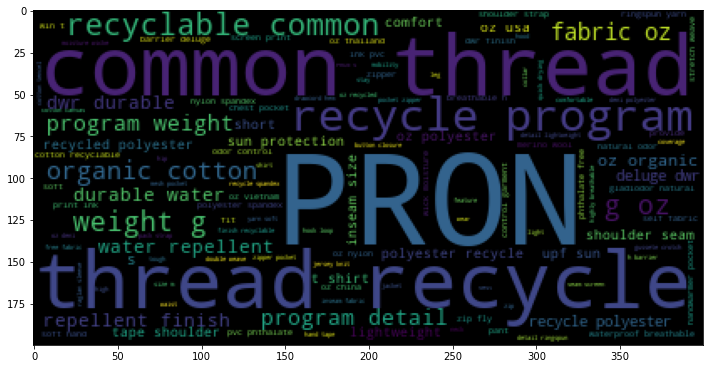

In [42]:
wd = wordcloud.WordCloud(stopwords=STOP_WORDS)

# Create a new corpus 
corpus_lemma = " ".join(corpus['clean_document'])

# Generate word cloud 
cloud = wd.generate(corpus_lemma)

# Show with matplotlib 
plt.figure(figsize=(12, 8))
plt.imshow(cloud)

plt.show()

8. Create a new numpy array X containing the TF-IDF transformation from the column clean_document, and then print the vocabulary of the corpus

In [48]:
# TF-IDF vector
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(corpus["clean_document"])

# X is a generator. We can transform that as an array
dense = X.toarray()
dense.shape

(500, 3577)

In [47]:
# Print vocabulary
for i, word in enumerate(vectorizer.vocabulary_):
    if i < 10:
        print(word)
    else:
         break

active
classic
boxer
reason
pron
cult
favorite
cool
especially
sticky


9. Create a DataFrame containing the result from TF-IDF

In [50]:
df_tf_idf = pd.DataFrame(dense, 
                         columns = [x for x in vectorizer.get_feature_names()],
                         index = ["item_{}".format(i) for i in range(len(corpus))])
df_tf_idf.head()

,abandon,ability,able,abrasion,abrasive,abroad,absolute,absorb,absorption,abstract,...,young,yvon,zest,zinger,zip,zipper,zippered,zippers,zone,zones
item_0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
item_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
item_2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
item_3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.296275,0.0,0.000000,0.0,0.0
item_4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.108089,0.0,0.074312,0.0,0.0


10. Use DBSCAN to make some clustering on the TF-IDF matrix. When dealing with texts, the distance metric to be used is "cosine" instead of "euclidean". You have to find some values for `eps` and `min_samples` that allow to get 10-20 clusters and not too many outliers. Write the cluster ids in the `corpus` DataFrame and in the TF-IDF DataFrame

In [54]:
# Clustering on documents
# Instanciate DBSCAN 
clustering = DBSCAN(eps=0.7, min_samples=3, metric="cosine", algorithm="brute")

# Fit on data 
## No need to normalize data, it already is! 
clustering.fit(X)

# Write cluster ids into corpus and X_df
corpus['cluster_id'] = clustering.labels_
display(corpus.head())

df_tf_idf['cluster_id'] = clustering.labels_
display(df_tf_idf.head())

,id,description,clean_description,clean_tokens,clean_document,cluster_id
0,1,Active classic boxers - There's a reason why o...,active classic boxers there s a reason why our...,"[active, classic, boxer, s, reason, -PRON-, bo...",active classic boxer s reason -PRON- boxer cul...,0
1,2,Active sport boxer briefs - Skinning up Glory ...,active sport boxer briefs skinning up glory re...,"[active, sport, boxer, brief, skin, glory, req...",active sport boxer brief skin glory require mo...,0
2,3,Active sport briefs - These superbreathable no...,active sport briefs these superbreathable no f...,"[active, sport, brief, superbreathable, fly, b...",active sport brief superbreathable fly brief m...,0
3,4,"Alpine guide pants - Skin in, climb ice, switc...",alpine guide pants skin in climb ice switch to...,"[alpine, guide, pant, skin, climb, ice, switch...",alpine guide pant skin climb ice switch rock t...,1
4,5,"Alpine wind jkt - On high ridges, steep ice an...",alpine wind jkt on high ridges steep ice and a...,"[alpine, wind, jkt, high, ridge, steep, ice, a...",alpine wind jkt high ridge steep ice alpine ja...,1


,abandon,ability,able,abrasion,abrasive,abroad,absolute,absorb,absorption,abstract,...,yvon,zest,zinger,zip,zipper,zippered,zippers,zone,zones,cluster_id
item_0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0
item_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0
item_2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0
item_3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.296275,0.0,0.000000,0.0,0.0,1
item_4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.108089,0.0,0.074312,0.0,0.0,1


11. Print the number of documents in each cluster

In [57]:
df_tf_idf['cluster_id'].value_counts()

 1     215
 0      72
 5      57
-1      32
 2      29
 7      24
 14     13
 4      10
 3       9
 6       8
 10      7
 12      6
 13      5
 9       5
 11      4
 8       4
Name: cluster_id, dtype: int64

12. Print sample of 3 documents from cluster 0

In [61]:
# Print sample of 3 documents from cluster 0
for d in corpus.loc[corpus['cluster_id']==0,:].sample(3)['description']:
    print(d)
    print()

Sol patrol shirt - Go ahead. Go bone fishing. Ride your horse across the Red Desert. Live like a Gila monster, but wear this shirt so you don't end up looking like one. The Sol Patrol's lustrous, quick-drying and exceptionally soft polyester is woven extra-tightly to block out UV rays (30-UPF rating). The princess seaming and yoke detail add a feminine touch with a fit that offers plenty of room for active casting and rein retrieval. Cleanly styled, the sleeves roll up and fasten with hidden snaps, shirt tabs secure with snaps, and the concealed chest pocket zips closed. With a hemostat flap. Recyclable through the Common Threads Recycling Program.<br><br><b>Details:</b><ul> <li>"Quick-drying polyester with tight weave is exceptionally soft and light, with 30-UPF rating for sun protection"</li> <li>Hidden zippered chest pocket</li> <li>Flattering princess seaming and yoke detail</li> <li>Roll-up sleeve with fastener</li> <li>Hemostat flap</li></ul><br><br><b>Fabric: </b>2.2-oz 100% pol

12.b. Print sample of 3 documents for each cluster

In [63]:
# Print sample of 3 documents for each cluster
for c in corpus['cluster_id'].value_counts().index :
    print("CLUSTER ", c)
    for d in corpus.loc[corpus['cluster_id'] == c ,:].sample(3)['description']:
        print(d)
        print()
    print('-----------')

CLUSTER  1
Guidewater shirt - It's a shirt. It's a jacket. It's...shacket? The Guidewater might fit like a traditional canvas fishing shirt, but don't be deceived  it repels breeze, bugs, drizzle and spray with soft shell performance. Added bonus: the casual good looks adapt to grocery runs and post-fishing dinners without screaming "I am a fish geek." Made of fast-drying, 4-way stretch nylon with DWR (durable water repellent) finish that provides 50+ UPF sun protection. Self-fabric tabs secure rolled sleeves and the snapdown collar remains unflappable even when running the boat wide open. With hidden daisy chain, snap placket and cuffs and brushed mesh pocket bags. One zippered and one hook-and-loop chest pocket keep essentials close at hand. Recyclable through the Common Threads Recycling Program.<br><br><b>Details:</b><ul> <li>"Stretch-woven nylon with DWR finish provides 50+ UPF sun protection; it is also durable, quick-drying and delivers 4-way stretch"</li> <li>Self-fabric tabs s

13. Print the 5 Most frequent words in each cluster

In [67]:
# 5 Most frequent words in each cluster
cols = [c for c in df_tf_idf.columns if c!='cluster_id']

for c in corpus['cluster_id'].value_counts().index :
    print("CLUSTER ", c)
    print(df_tf_idf.loc[df_tf_idf['cluster_id']==c,cols].mean(axis=0).sort_values(ascending=False)[0:5])
    print('-----------')

CLUSTER  1
pocket     0.093584
recycle    0.064721
organic    0.062961
pron       0.061772
cotton     0.061521
dtype: float64
-----------
CLUSTER  0
sun          0.105881
polyester    0.092419
pron         0.092042
upf          0.082910
recycle      0.081664
dtype: float64
-----------
CLUSTER  5
shirt        0.174273
ringspun     0.166314
print        0.162620
phthalate    0.160863
pvc          0.159192
dtype: float64
-----------
CLUSTER  -1
organic    0.069207
cotton     0.069207
pron       0.058653
oz         0.047937
pocket     0.045855
dtype: float64
-----------
CLUSTER  2
pocket          0.136592
mesh            0.114971
strap           0.107242
polyurethane    0.098697
deni            0.094673
dtype: float64
-----------
CLUSTER  7
merino          0.346464
wool            0.260152
wash            0.152559
construction    0.103051
odor            0.101318
dtype: float64
-----------
CLUSTER  14
spandex      0.136034
bra          0.121757
removable    0.119238
nylon        0.118698
b

14. Make a wordcloud for each cluster : can you see a difference between the groups ?

CLUSTER  1


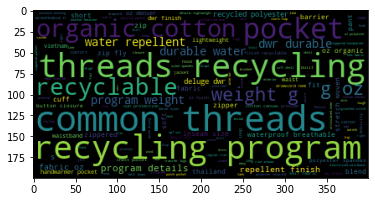

-----------
CLUSTER  0


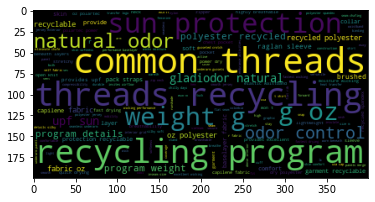

-----------
CLUSTER  5


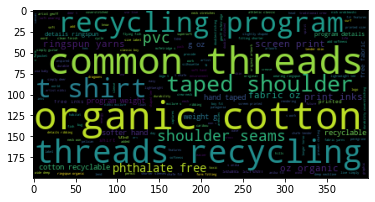

-----------
CLUSTER  -1


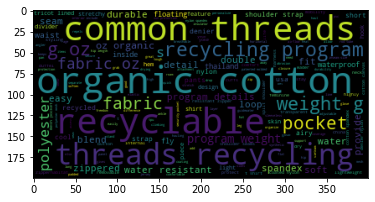

-----------
CLUSTER  2


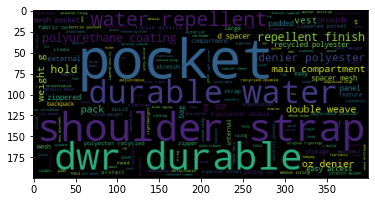

-----------
CLUSTER  7


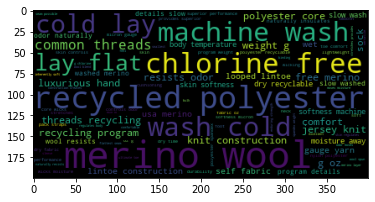

-----------
CLUSTER  14


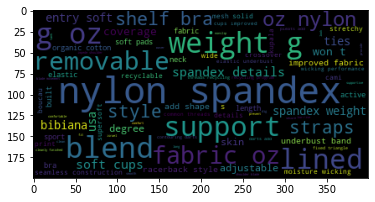

-----------
CLUSTER  4


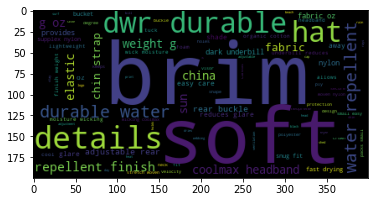

-----------
CLUSTER  3


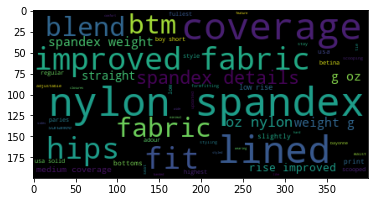

-----------
CLUSTER  6


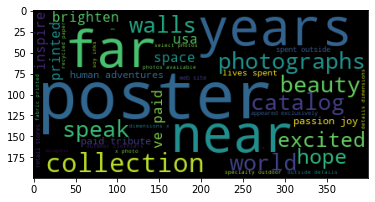

-----------
CLUSTER  10


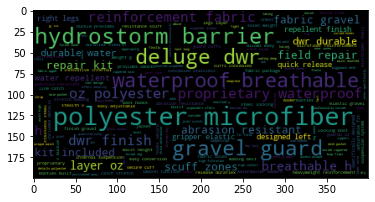

-----------
CLUSTER  12


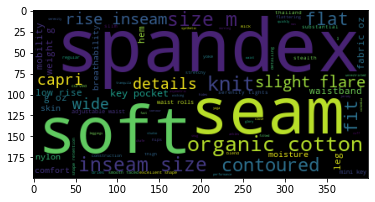

-----------
CLUSTER  13


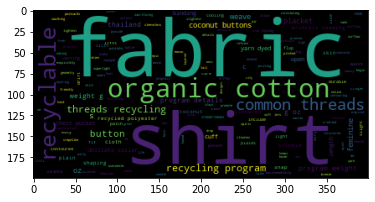

-----------
CLUSTER  9


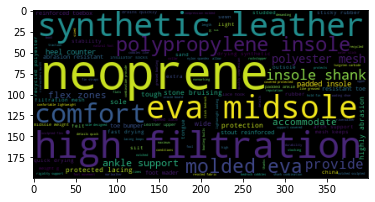

-----------
CLUSTER  11


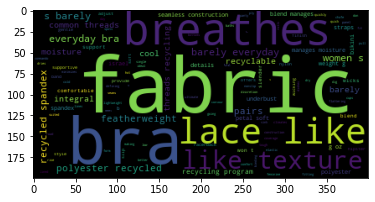

-----------
CLUSTER  8


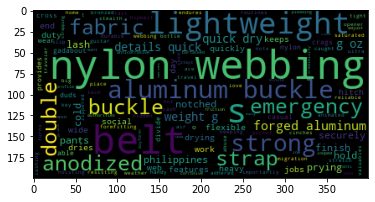

-----------


In [68]:
# Word cloud for each cluster
for c in corpus['cluster_id'].value_counts().index :
    print("CLUSTER ", c)
    texts = " ".join(corpus.loc[corpus['cluster_id']==c,'clean_description'])
    cloud = wd.generate(texts)
    plt.imshow(cloud)
    plt.show()
    print('-----------')